In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("housingdata.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns=housing_colnames
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## SKLEARN

In [4]:
rm=df[['RM']]
medv=df[['MEDV']]

In [5]:
reg=linear_model.LinearRegression()
reg.fit(rm,medv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
m=reg.coef_
m

array([[9.10210898]])

In [7]:
c=reg.intercept_
c

array([-34.67062078])

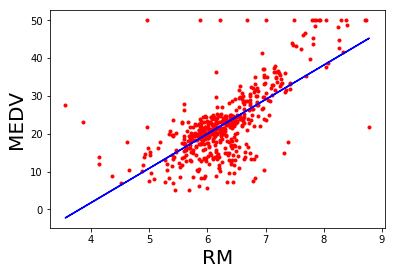

In [8]:
%matplotlib inline
plt.xlabel('RM', fontsize=20)
plt.ylabel('MEDV', fontsize=20)
plt.scatter(df.RM,df.MEDV,color='red',marker='.')
plt.plot(df.RM,reg.predict(rm),color='blue')

In [9]:
p1=reg.predict(rm)
df['pred1']=p1
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,pred1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152


In [10]:
#Writing to the file
#df.to_csv("housingdata.csv")

## Covariance

In [11]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(x,y):
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
 

In [12]:
y_y=df['MEDV'].values
x_x=df['RM'].values
c2, m2 = coefficients(x_x,y_y)
print('Coefficients: m2=%.8f, c2=%.8f' % (c2, m2))

Coefficients: m2=-34.67062078, c2=9.10210898


In [13]:
p2=[]
for i in range(len(x_x)):
    t=m2*x_x[i]+c2
    p2.append(t)
df['pred2']=p2
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,pred1,pred2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746,25.175746
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021,23.774021
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032,30.728032
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938,29.025938
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152,30.382152


## Gradient Descent

In [14]:
def predictPrice(x,theta):
    return np.dot(x,theta)

In [15]:
def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

In [16]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()
    

In [17]:
def gradientDescentLinearRegression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = df["RM"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = df["MEDV"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        #if i%1000==0:
         #   print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
          #  abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')
    return theta

In [18]:
thet=gradientDescentLinearRegression()

theta0 = 5000
theta1 = 5000
Costs = 5000


In [19]:
m3=thet[1]
c3=thet[0]

In [20]:
p3=[]
for i in range(len(x_x)):
    t=m3*x_x[i]+c3
    p3.append(t)
df['pred3']=p3
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,pred1,pred2,pred3
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746,25.175746,25.105585
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021,23.774021,23.754378
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032,30.728032,30.457769
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938,29.025938,28.817017
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152,30.382152,30.124354


## Comparisons

In [21]:
a=df[['pred1']]
b=df[['pred2']]
c=df[['pred3']]

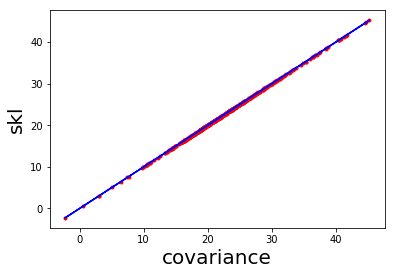

In [22]:
r1=linear_model.LinearRegression()
r1.fit(p1,p2)

%matplotlib inline
plt.xlabel('covariance', fontsize=20)
plt.ylabel('skl', fontsize=20)
plt.scatter(df.pred2,df.pred1,color='red',marker='.')
plt.plot(df.pred2,r1.predict(b),color='blue')

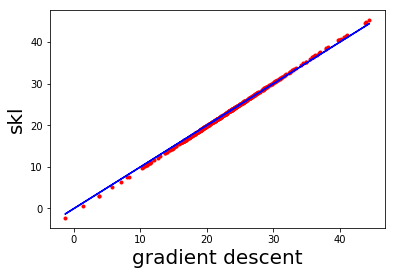

In [23]:
r2=linear_model.LinearRegression()
r2.fit(p1,p2)

%matplotlib inline
plt.xlabel('gradient descent', fontsize=20)
plt.ylabel('skl', fontsize=20)
plt.scatter(df.pred3,df.pred1,color='red',marker='.')
plt.plot(df.pred3,r1.predict(c),color='blue')